In [1]:
import pandas as pd
data=pd.read_csv("C://Users//POPO//Desktop//HW1.csv")
data.head()

,Observation,Age,Expenditures
0,1,49,95
1,2,15,104
2,3,43,91
3,4,45,98
4,5,40,94


In [2]:
data.shape

(26, 3)

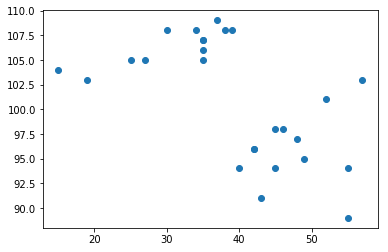

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data["Age"],data["Expenditures"])

In [6]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [7]:
model = sm.OLS(data["Expenditures"], data["Age"])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Expenditures   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           7.76e-15
Time:                        14:29:23   Log-Likelihood:                -125.05
No. Observations:                  26   AIC:                             252.1
Df Residuals:                      25   BIC:                             253.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            2.3792      0.146     16.314      0.000       2.079       2.680
==============================================================================
Omnibus:                        0.883   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.825
Skew:                           0.203   Prob(JB):                        0.662
Kurtosis:                       2.228   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
print('Parameters: ', round(results.params[0],2))
print('t-value: ', round(results.tvalues[0],2))
print("standard error of b:",round(results.bse[0],3))

Parameters:  2.38
t-value:  16.31
standard error of b: 0.146


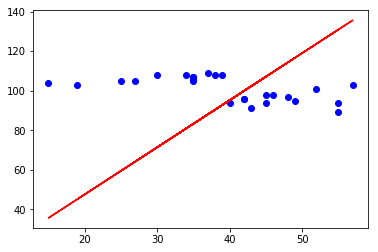

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data["Age"],data["Expenditures"], c='blue')
plt.plot(data["Age"],results.predict(data["Age"]),c="red")

It seems that there are two groups on the picture.In addition,we can find that the regression fits badly when the age is below 40 and because there are more points scatter around when the value of age is 40;therefore,the regression predicts that region(age around 40)better!

In [10]:
below=data[data["Age"]<40]
above=data[data["Age"]>=40]
model1 = sm.OLS(below["Expenditures"], below["Age"])
results1 = model1.fit()
model2 = sm.OLS(above["Expenditures"], above["Age"])
results2 = model2.fit()
print('Parameters(below 40): ', round(results1.params[0],2))
print('t-value(below 40): ', round(results1.tvalues[0],2))
print("standard error of b(below 40):",round(results1.bse[0],3))
print('Parameters(above 40): ', round(results2.params[0],2))
print('t-value(above 40): ', round(results2.tvalues[0],2))
print("standard error of b(above 40):",round(results2.bse[0],3))

Parameters(below 40):  3.26
t-value(below 40):  15.89
standard error of b(below 40): 0.205
Parameters(above 40):  1.99
t-value(above 40):  31.18
standard error of b(above 40): 0.064


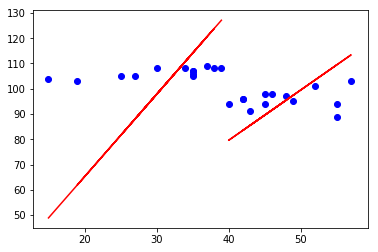

In [11]:
plt.scatter(below["Age"],below["Expenditures"], c='blue')
plt.plot(below["Age"],results1.predict(below["Age"]),c="red")
plt.scatter(above["Age"],above["Expenditures"], c='blue')
plt.plot(above["Age"],results2.predict(above["Age"]),c="red")